In [24]:
from tespy.connections import HumidAirConnection, Connection
from tespy.components import Source, Sink, MovingBoundaryHeatExchanger
from tespy.networks import Network

from CoolProp.CoolProp import HAPropsSI

In [25]:
nw = Network()
nw.units.set_defaults(
    temperature="°C",
    pressure="bar",
    heat="kW"
)

In [26]:
def get_water_air_mixture_fractions_pTR(p, T, R):
    w = HAPropsSI("W", "P", p, "T", T, "R", R)
    return get_water_air_mixture_fractions_w(w)


def get_water_air_mixture_fractions_w(w):
    air = 1 / (1 + w)
    return {"air": air, "water": 1 - air}

In [ ]:
so = Source("source")
hex = MovingBoundaryHeatExchanger("heat exchanger")
si = Sink("sink")

so2 = Source("refrigerant source")
si2 = Sink("refrigerant sink")

a1 = Connection(so2, "out1", hex, "in2", label="a1")
a2 = Connection(hex, "out2", si2, "in1", label="a2")

c1 = Connection(so, "out1", hex, "in1", label="c1")
c2 = Connection(hex, "out1", si, "in1", label="c2")

nw.add_conns(a1, a2, c1, c2)

a1.set_attr(fluid={"NH3": 1}, m=2, x=0.3)
a2.set_attr(td_dew=5, T_dew=-20)

c1.set_attr(
    fluid=get_water_air_mixture_fractions_pTR(p=1e5, T=268.16, R=1),
    p=1,
    T=-5,
    mixing_rule="humidair"
)
c2.set_attr(T=-10)

hex.set_attr(dp1=0, dp2=0)

nw.solve("design")


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.88e+06   | 0 %        | 3.72e+02   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
 2     | 1.06e-04   | 100 %      | 2.09e-08   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
 3     | 0.00e+00   | 100 %      | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
 4     | 0.00e+00   | 100 %      | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.00 s, Iterations per second: 2700.78


In [28]:
nw.print_results()


##### RESULTS (MovingBoundaryHeatExchanger) #####
+----------------+-----------+----------+----------+----------+----------+-----------+----------+----------+----------+----------+----------+----------+------------+-----------+-----------+----------+------------+
|                |         Q |       kA |   td_log |    ttd_u |    ttd_l |   ttd_min |      pr1 |      pr2 |      dp1 |      dp2 |    zeta1 |    zeta2 |   eff_cold |   eff_hot |   eff_max |       UA |   td_pinch |
|----------------+-----------+----------+----------+----------+----------+-----------+----------+----------+----------+----------+----------+----------+------------+-----------+-----------+----------+------------|
| heat exchanger | -1.88e+03 | 1.88e+05 | 1.00e+01 | 1.00e+01 | 1.00e+01 |  1.00e+01 | 1.00e+00 | 1.00e+00 | 0.00e+00 | 0.00e+00 | 0.00e+00 | 0.00e+00 |   9.76e-01 |  3.33e-01 |  9.76e-01 | 1.53e+05 |   1.00e+01 |
+----------------+-----------+----------+----------+----------+----------+-----------+-------

In [29]:
heat, T_hot, T_cold, _, _ = hex.calc_sections()

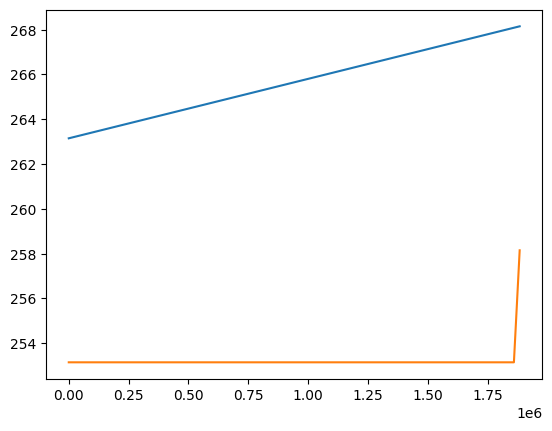

In [30]:
from matplotlib import pyplot as plt


plt.plot(heat, T_hot)
plt.plot(heat, T_cold)